In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")


In [3]:
df=pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'],inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(21359, 18)

In [13]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
### Our Data is Imbalanced 


In [16]:
cat_cols=['type_of_meal_plan', 'required_car_parking_space','market_segment_type','room_type_reserved','repeated_guest','booking_status']
num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests' ]

In [17]:
len(cat_cols)+len(num_cols)== len(df.columns)

True

# DATA ANALYIS

In [18]:
data =df.copy()

In [19]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### UNIVARIATE ANALYSIS

In [20]:
def num_plot_dist(df,num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))

    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Historgram for {column}")
        
        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"BoxPLot for {column}")
    
    plt.tight_layout()
    plt.show()

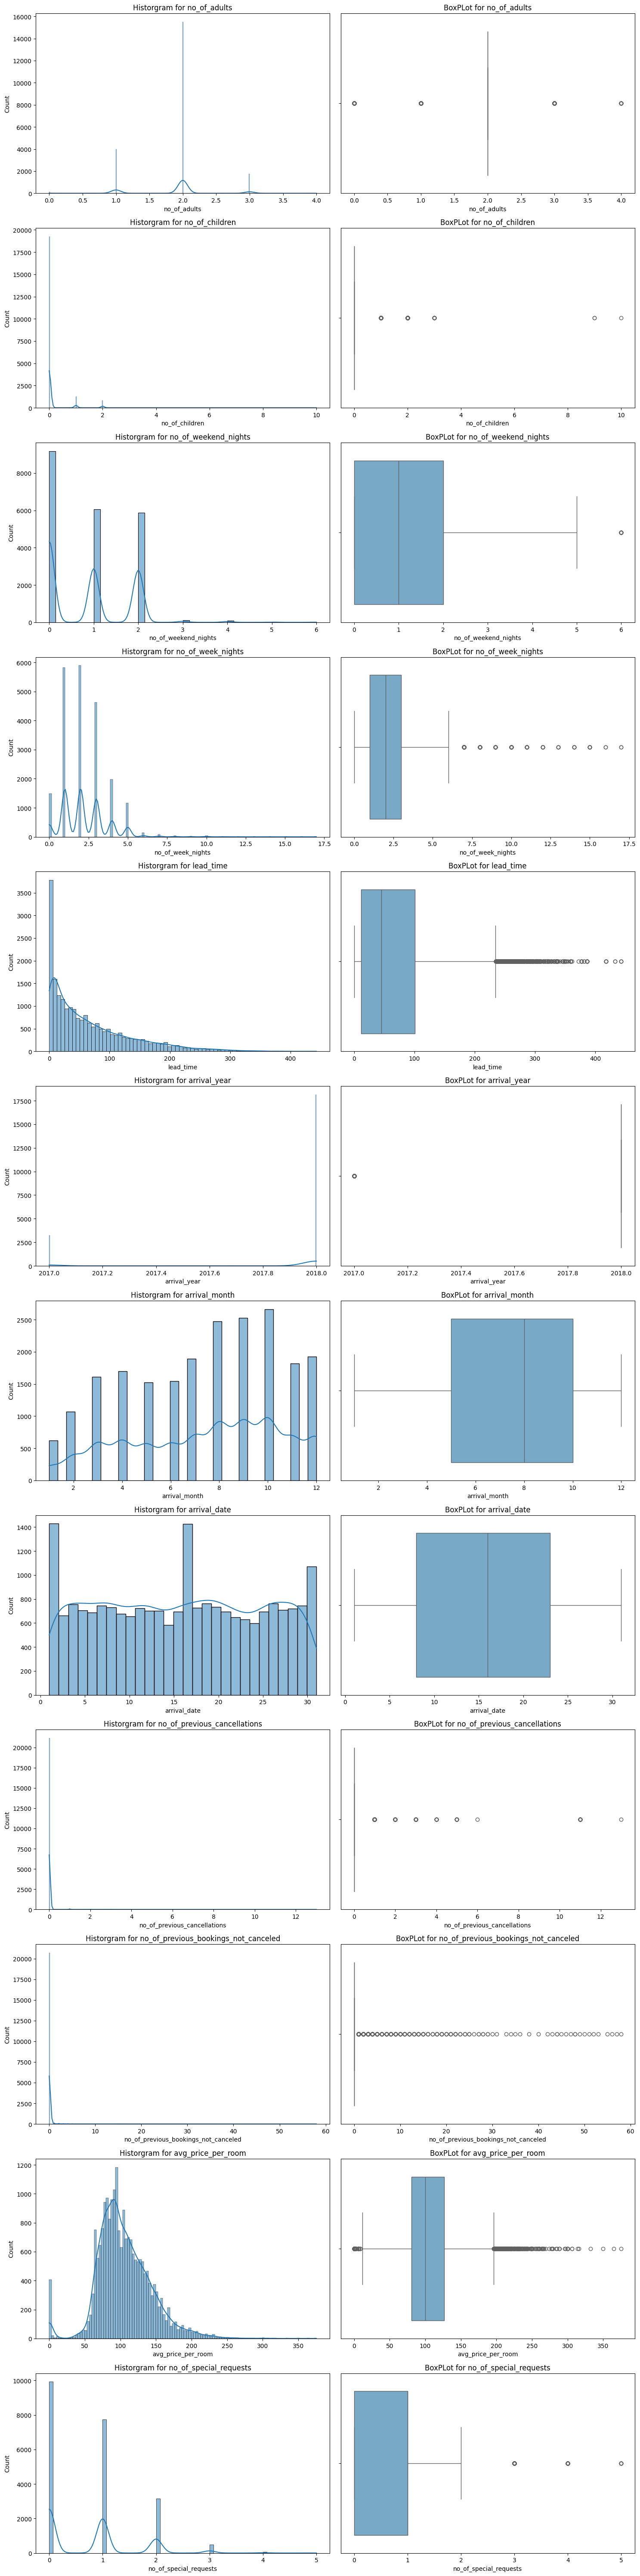

In [21]:
num_plot_dist(data,num_cols)

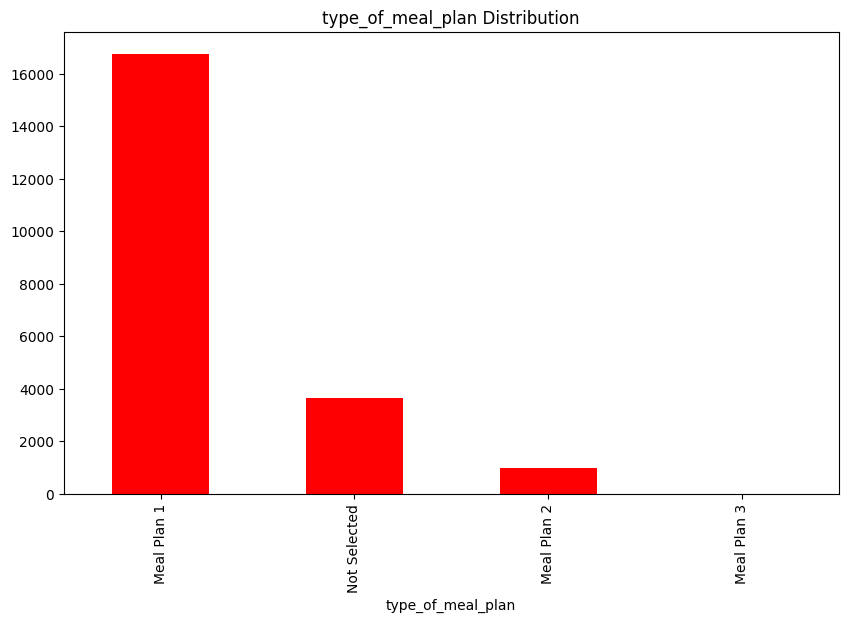

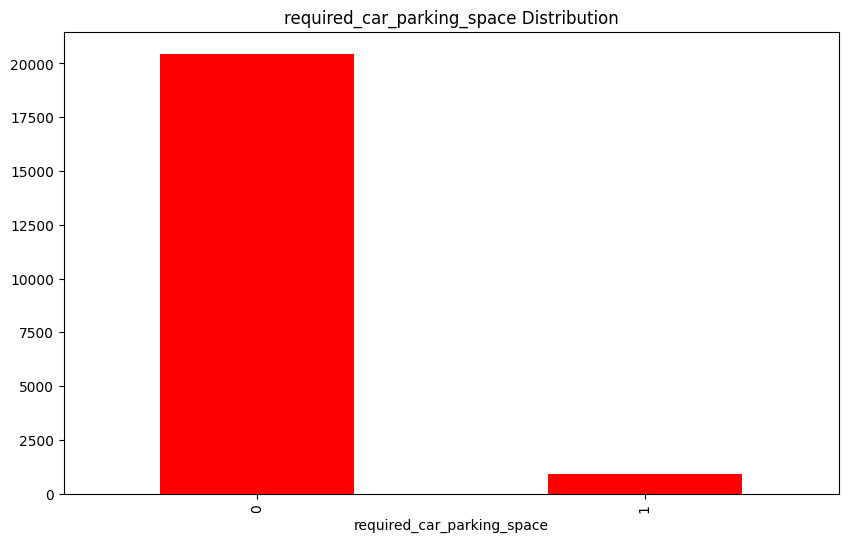

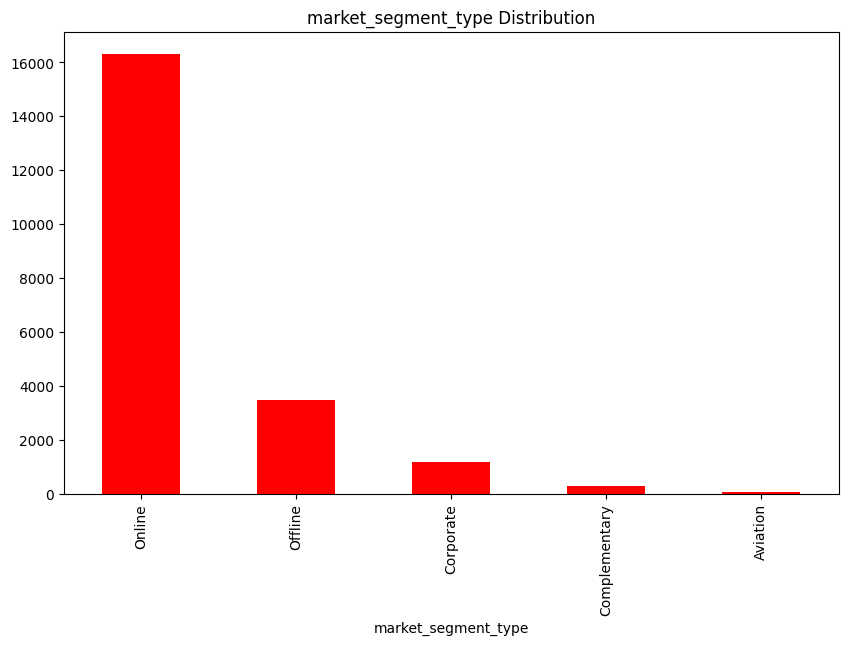

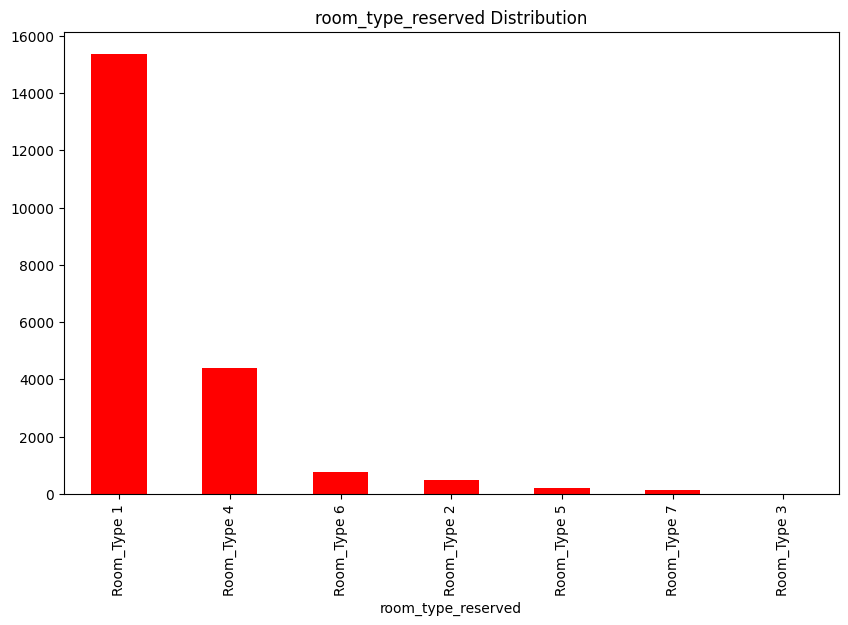

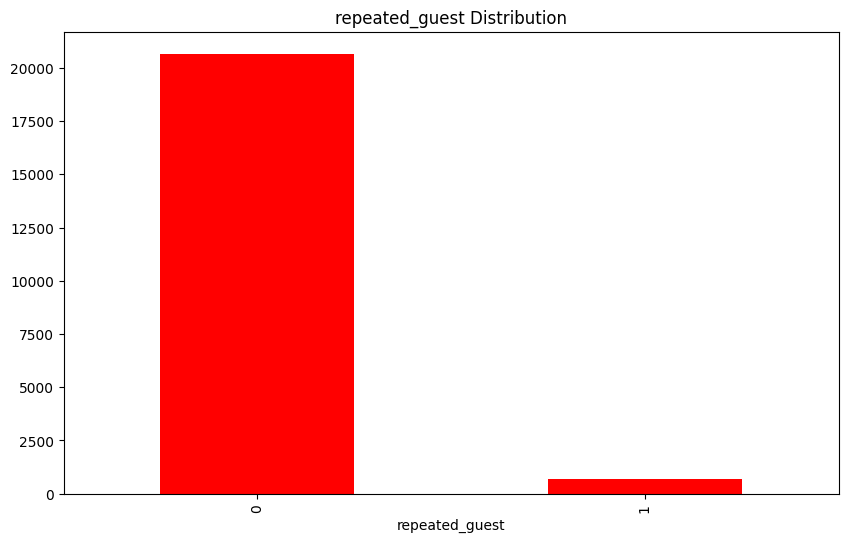

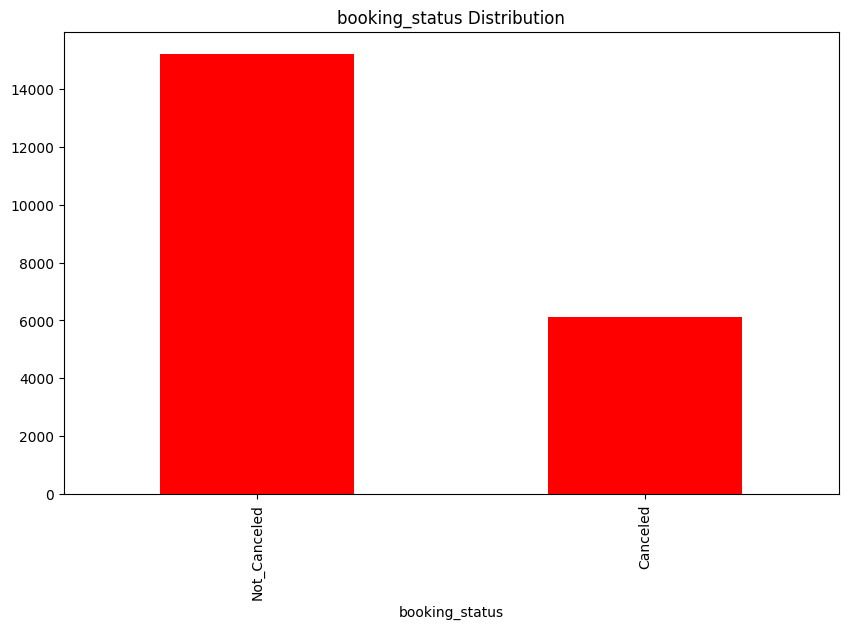

In [22]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind="bar" ,color="red")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.show()
    
    

### BIVARIATE ANALYSIS


In [23]:
def plot_bivariate_num(df,target,num_features) :
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2
    
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()
    
    for i,column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    plt.tight_layout()
    plt.show()

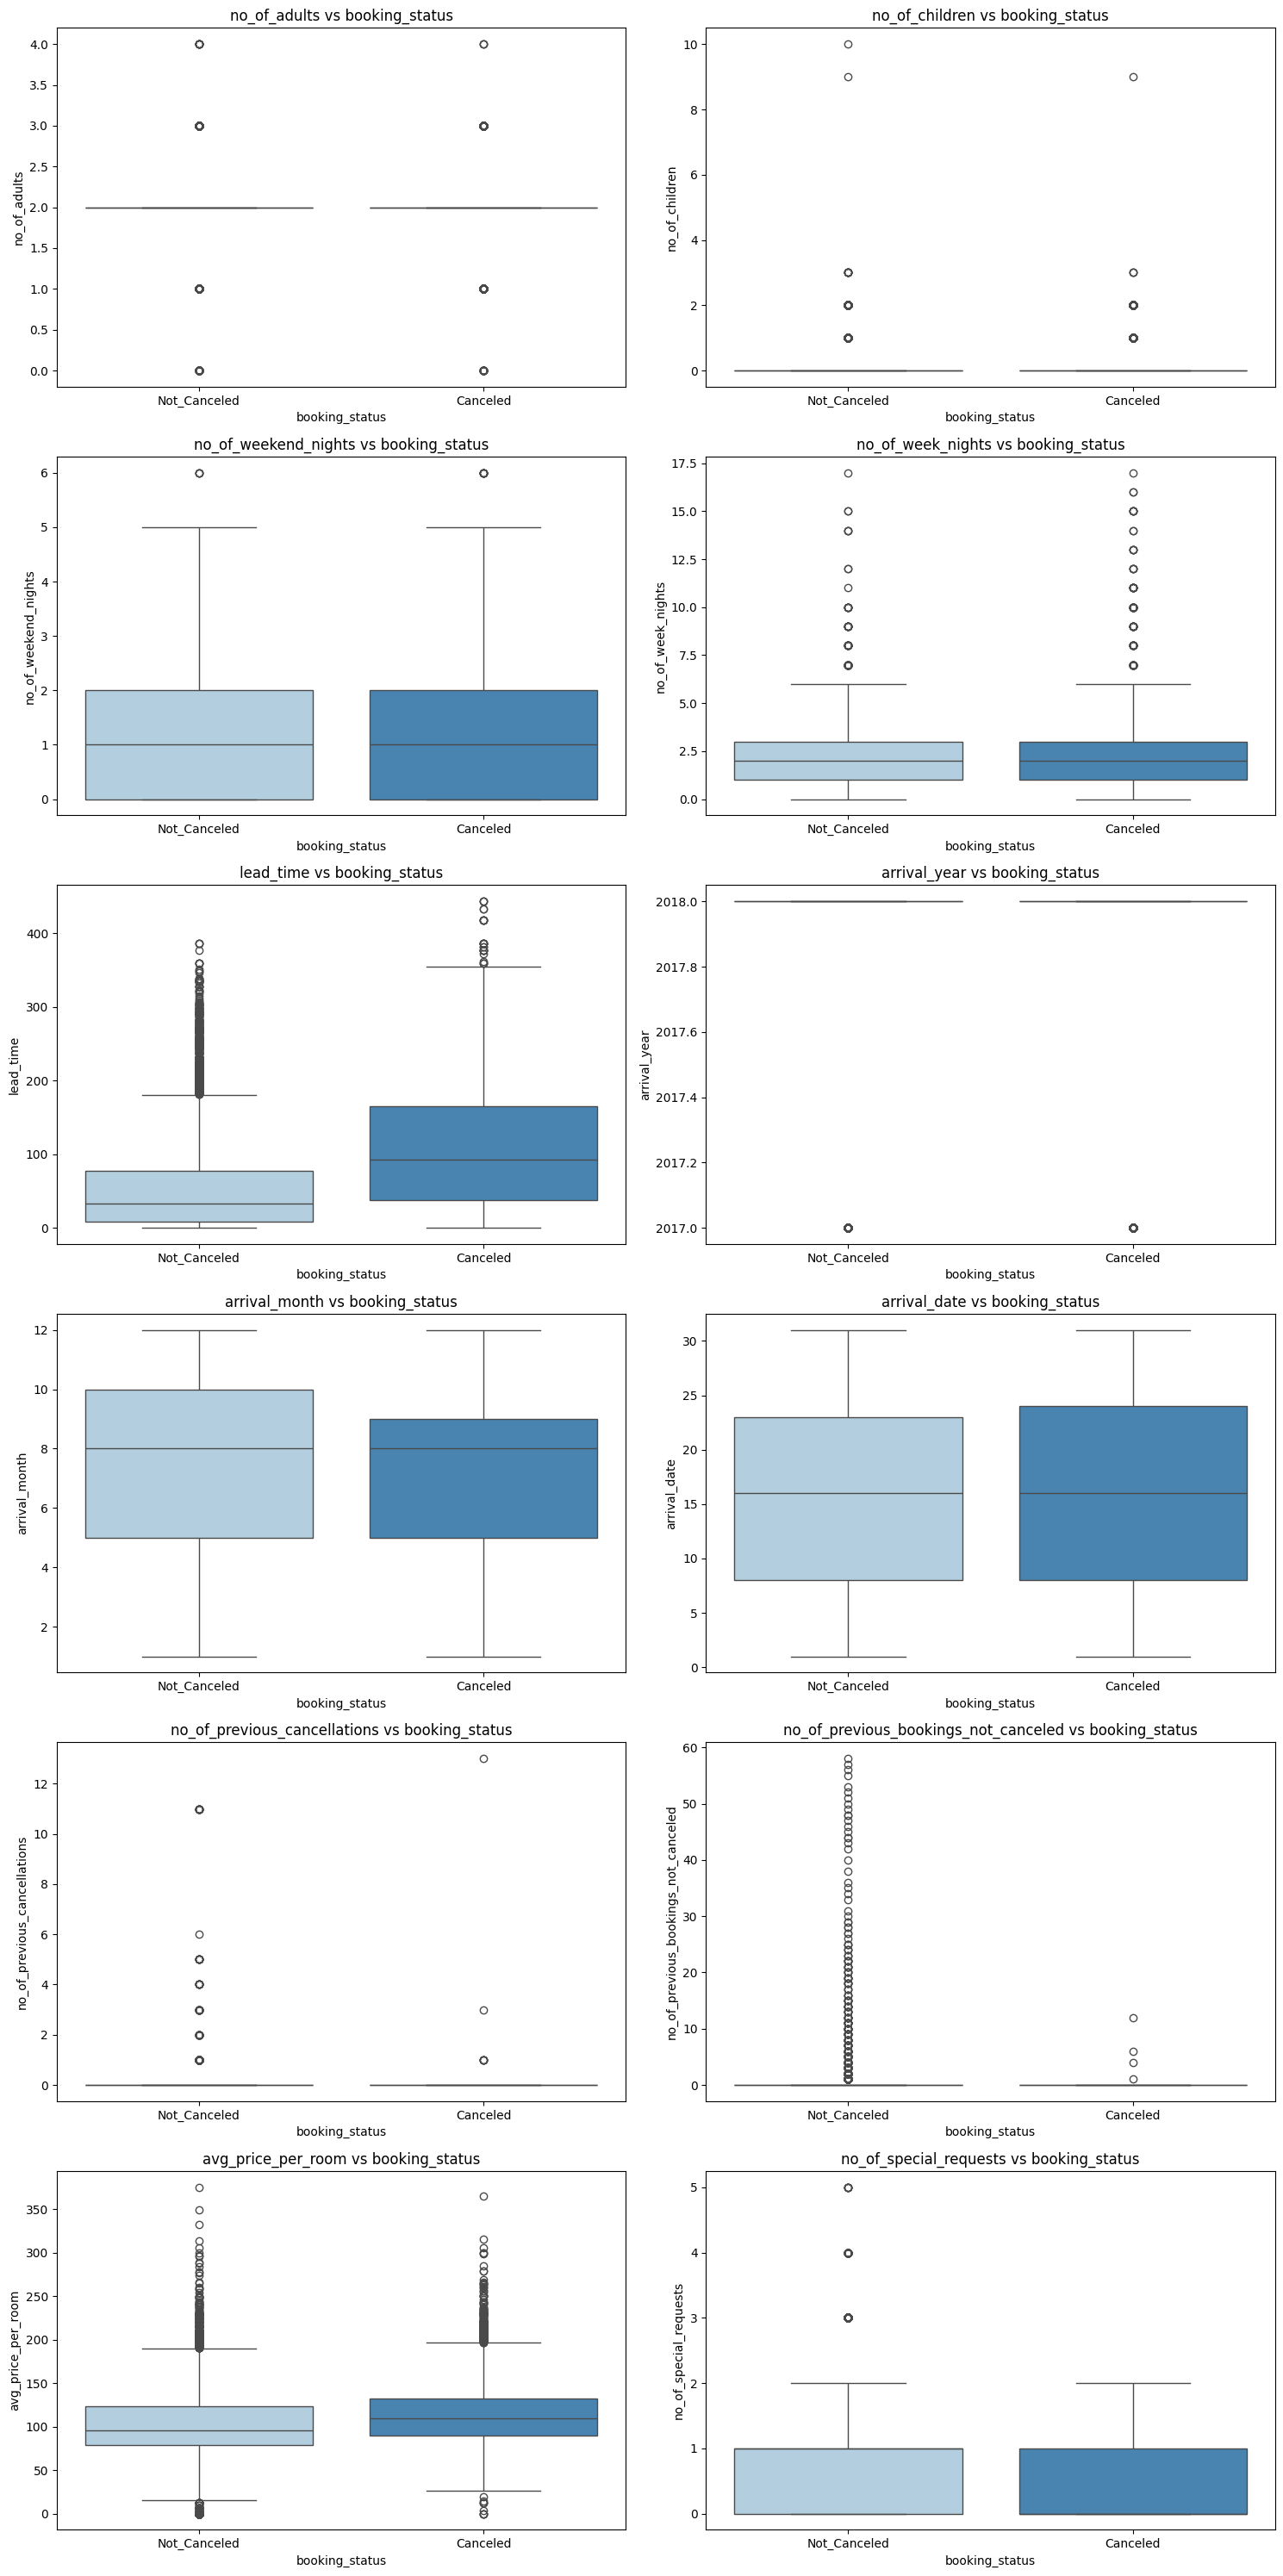

In [24]:
plot_bivariate_num(data,'booking_status',num_cols)

In [25]:
def plot_bivariate_of_categorical(df,target,cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()
    
    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()  
    
    

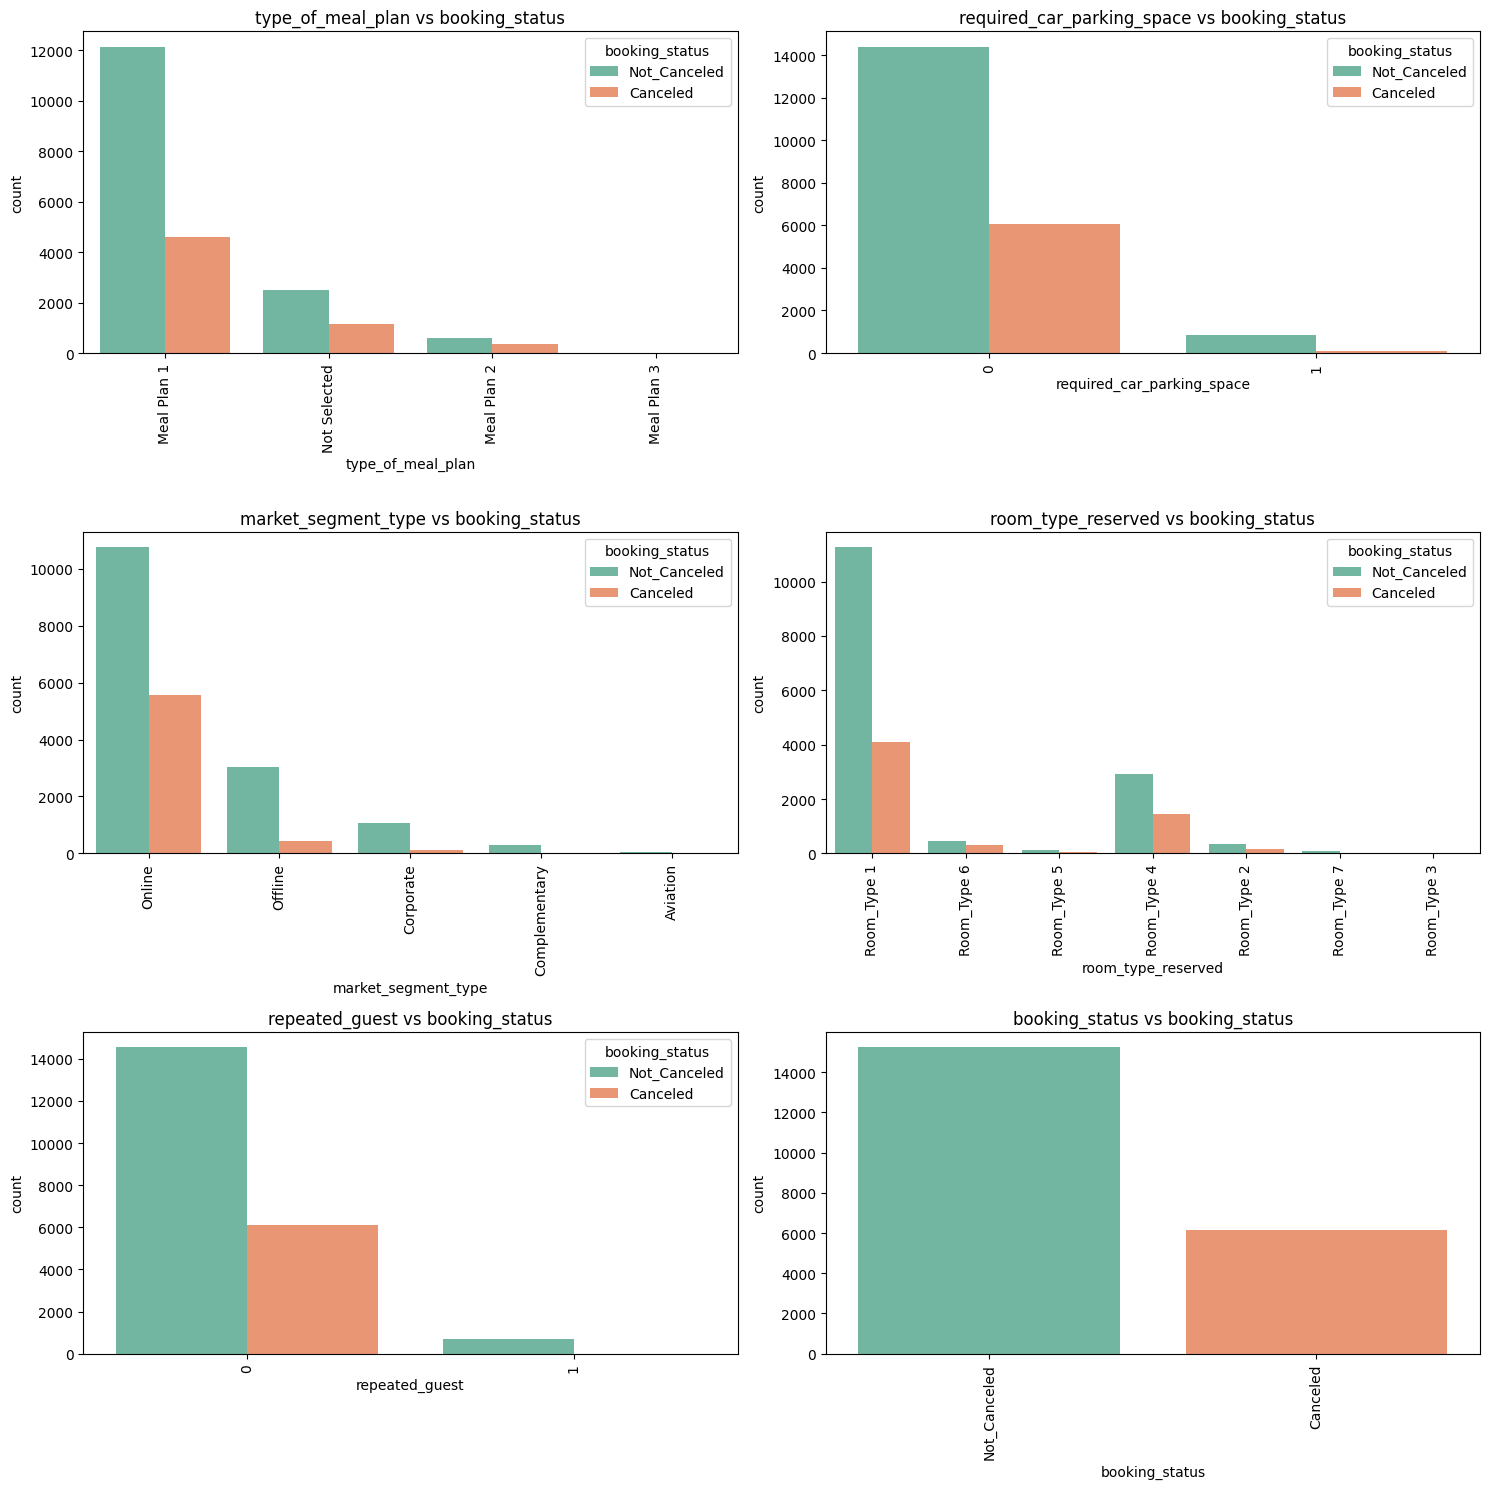

In [26]:
plot_bivariate_of_categorical(data,'booking_status',cat_cols)

### DATA PROCESSING 

In [27]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [29]:
### Label Encoding 
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder=LabelEncoder()

mappings={}

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [31]:
for label,code in mappings.items():
    print(f"{label } ->{code}")

type_of_meal_plan ->{'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space ->{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
market_segment_type ->{'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
room_type_reserved ->{'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
repeated_guest ->{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status ->{'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


### MULTI COLLINEARITY

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [33]:
X=add_constant(df)

vif_data=pd.DataFrame()


In [34]:
vif_data["feature"]=X.columns

In [35]:
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [36]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### IF THE VIF IS >5 then MULTICOLLIENEARIT EXISTS , IF VIF>10 THEN VERY HIGH MULTI COLLINEARITY IF LESS THEN 5 VIF THEN NEGLIGIBLE MULTI COLLINEARITY 

In [37]:
### our data  does not have multi collinearity 
corr =df.corr()

<Axes: >

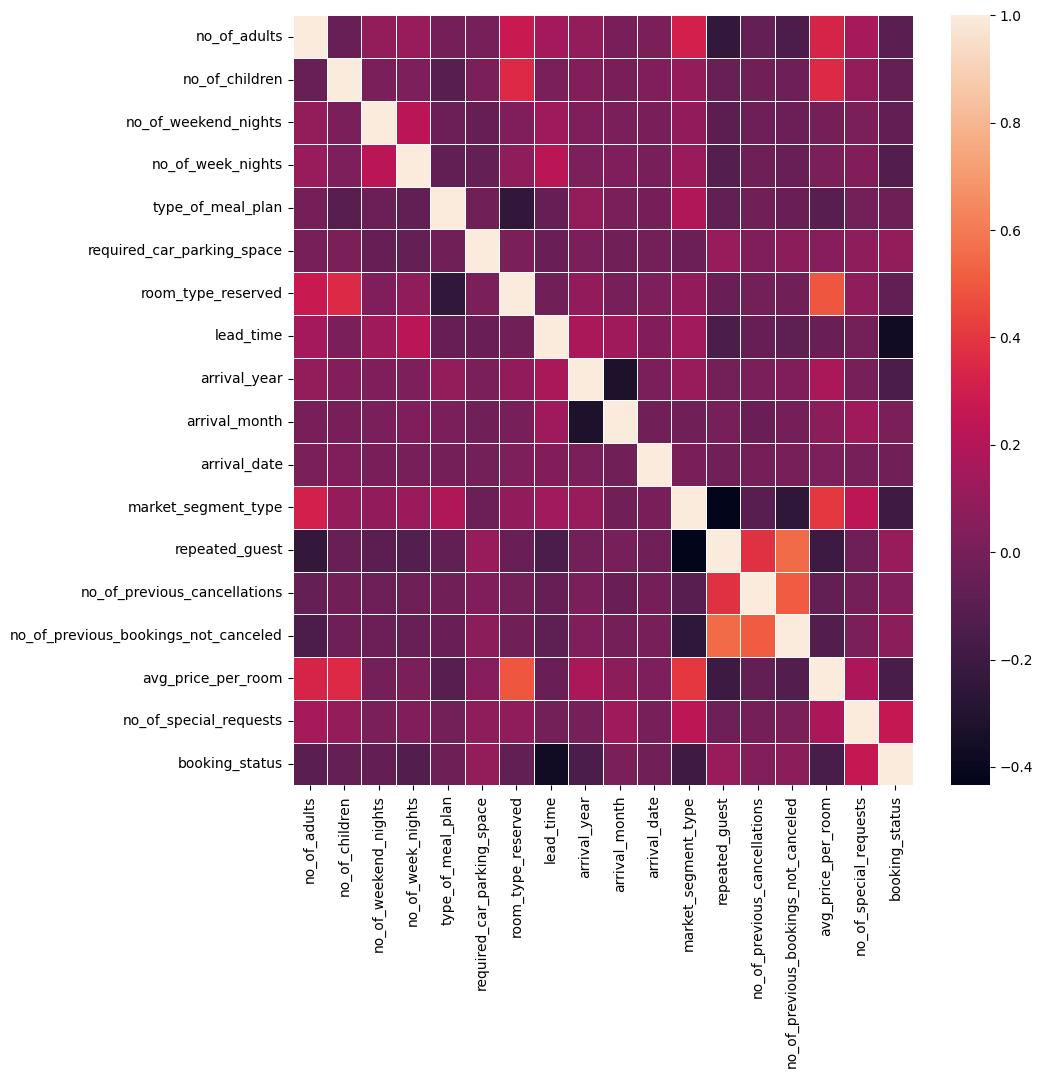

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.5)

In [39]:
### SKEWNESS 

skewness=df.skew()

In [40]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [41]:
## Log transformation for skewness handling 

for col in df.columns :
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [42]:
new_skewness=df.skew()

In [43]:
new_skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [44]:
### HANDLING IMBALANCED DATA 
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [45]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [46]:
from imblearn.over_sampling import SMOTE


In [47]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [48]:
pd.Series(y_res)

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [50]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [51]:
df.shape

(21359, 18)

In [52]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status']=y_res

In [53]:
balanced_df.shape

(30462, 18)

In [54]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [55]:
df=balanced_df.copy()

In [56]:
### FEATURE SELECETION 


In [57]:
len(df.columns)

18

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [60]:
model =RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [63]:
feature_importance=model.feature_importances_

In [65]:
feature_importance_df=pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [66]:
feature_importance_df

,feature,importance
0,no_of_adults,0.017789
1,no_of_children,0.006895
2,no_of_weekend_nights,0.030436
3,no_of_week_nights,0.044465
4,type_of_meal_plan,0.020160
5,required_car_parking_space,0.011259
6,room_type_reserved,0.019279
7,lead_time,0.261140
8,arrival_year,0.017168
9,arrival_month,0.086560


In [67]:
top_features_importance_df=feature_importance_df.sort_values(by="importance",ascending=False)

In [68]:
top_10_features=top_features_importance_df['feature'].head(10)

In [69]:
top_10_df=df[top_10_features.tolist()+['booking_status']]

In [70]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [71]:
df=top_10_df.copy()

### MODEL SELECTION

In [72]:
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]1/2 [lightgbm]


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [75]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
classifiers={
    "Random Forest":RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "XGBoost":XGBClassifier(random_state=42),
    "AdaBoost":AdaBoostClassifier(random_state=42),
    "LGBM":LGBMClassifier(random_state=42)
    }

In [84]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1Score":[]
}

In [86]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1Score"].append(f1)
    

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [87]:
metrics_df=pd.DataFrame(metrics)

In [89]:
metrics_df


,Model,Accuracy,Precision,Recall,F1Score
0,Random Forest,0.889710,0.891574,0.889251,0.890411
1,Logistic Regression,0.775152,0.803571,0.732899,0.766610
2,Gradient Boosting,0.835221,0.817846,0.865798,0.841139
3,Support Vector Classifier,0.720171,0.729412,0.706840,0.717949
4,Decision Tree,0.842442,0.851432,0.832573,0.841897
5,KNN,0.779255,0.855964,0.675570,0.755143
6,Naive Bayes,0.773182,0.803161,0.728339,0.763922
7,XGBoost,0.872641,0.868573,0.880456,0.874474
8,AdaBoost,0.804366,0.800769,0.814332,0.807494
9,LGBM,0.865255,0.850421,0.888925,0.869247


In [90]:
### TRAINING RANDOM FOREST MODEL 


In [92]:
## hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [93]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
rf=RandomForestClassifier(random_state=42)


In [101]:
params_dist={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False]
}

In [103]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [104]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.6s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127506c50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127ea1f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127e0a710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1279ed7d0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [105]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [106]:
best_rf_model=random_search.best_estimator_

In [108]:
y_pred=best_rf_model.predict(X_test)

In [109]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [110]:
accuracy

0.8910224848186443

In [111]:
precision

0.8888170652876535

In [112]:
recall

0.8957654723127035

In [113]:
f1

0.8922777417261518

In [114]:
### SAVE THIS MODEL 

In [115]:
import joblib

In [116]:
joblib.dump(best_rf_model,'random_forest.pkl')

['random_forest.pkl']